In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('2018_features.csv', index_col='timestamp', parse_dates=True)

In [65]:
df.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12713908 entries, 0 to 12713907
Data columns (total 10 columns):
timestamp      datetime64[ns]
station_id     int64
bikes          int64
spaces         int64
total_docks    int64
bike_lag       int64
hour           int64
day_of_week    int64
month          int64
deposit        int64
dtypes: datetime64[ns](1), int64(9)
memory usage: 970.0 MB


In [4]:
validate_model = pd.read_csv('pboh_test.csv', index_col='timestamp', parse_dates=True )

In [5]:
validate_model.head(1)

,tfl_id,bikes,spaces,deposit_lag,hourVal,dowVal
timestamp,,,,,,
2018-07-21 14:52:02,34.0,3.0,27.0,7.0,14.0,5.0


In [6]:
X = df.drop('deposit', axis=1)
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
lrm = LogisticRegression(random_state=0)


In [9]:
model = lrm.fit(X_train, y_train)

In [10]:
predictions = model.predict(X_test)

In [11]:
plt.scatter(y_test, predictions)
plt.xlabel(“True Values”)
plt.ylabel(“Predictions”)

SyntaxError: invalid character in identifier (<ipython-input-11-eda4a6d1e546>, line 2)

In [ ]:
print(“Score:”, model.score(X_test, y_test))

In [16]:
df = df.reset_index()

In [54]:
df2 = df.resample(rule='3Min', on='timestamp').mean()

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85776 entries, 2018-01-01 00:00:00 to 2018-06-28 16:45:00
Freq: 3T
Data columns (total 10 columns):
station_id     83353 non-null float64
bikes          83353 non-null float64
spaces         83353 non-null float64
total_docks    83353 non-null float64
bike_lag       83353 non-null float64
hour           83353 non-null float64
day_of_week    83353 non-null float64
month          83353 non-null float64
deposit        83353 non-null float64
minute         85776 non-null int64
dtypes: float64(9), int64(1)
memory usage: 7.2 MB


In [56]:
df2['minute'] = pd.DatetimeIndex(df2.index).minute

In [62]:
dfPivot = pd.pivot_table(df2, values = "bikes", 
                             columns = "day_of_week", index = 'hour')

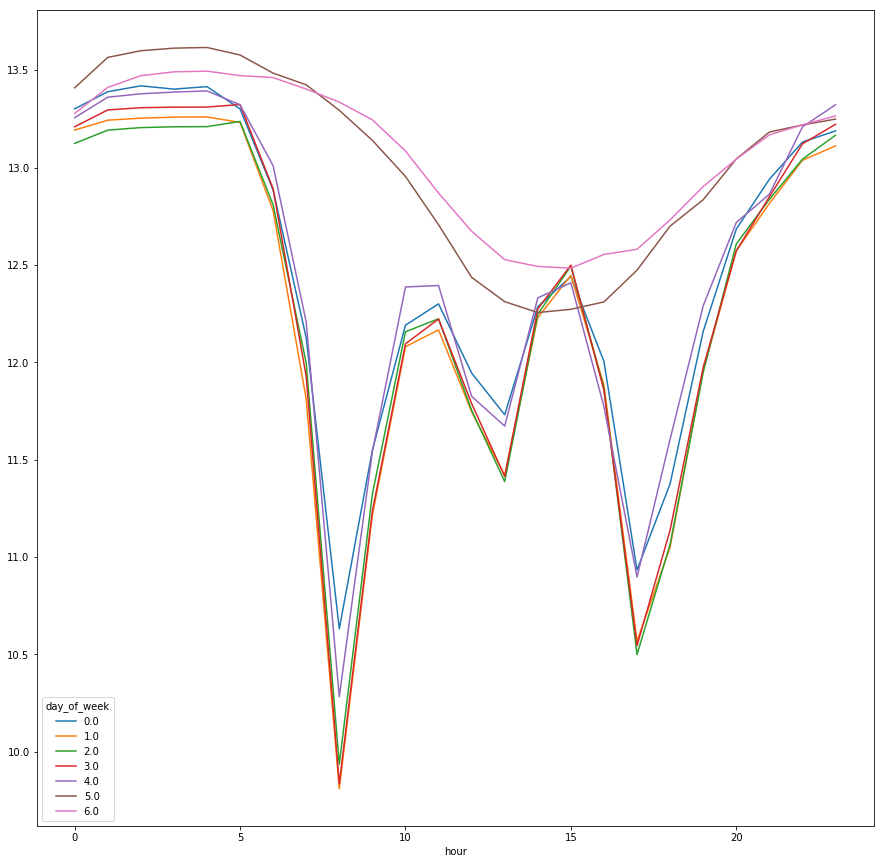

In [63]:
dfPivot.plot( figsize=(15, 15), layout=(3, 5), sharey=True)

AttributeError: 'int' object has no attribute 'toordinal'

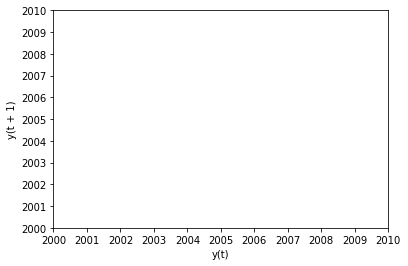

In [68]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(df)
pyplot.show()